In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # устанавливаем seaborn как по-умолчанию для отрисовки графиков
import os
import cv2
from google.colab import drive


---

### Датасет


---

Загружаем папку с датасетом из гугл диска

In [2]:
drive.mount('/content/drive')
# get the path/directory
folder_path = "/content/drive/MyDrive/painting_ds"
images = os.listdir(folder_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Выводим первые пять изображений с их названиями

johan-hendrik-weissenbruch_summer-landscape.jpg


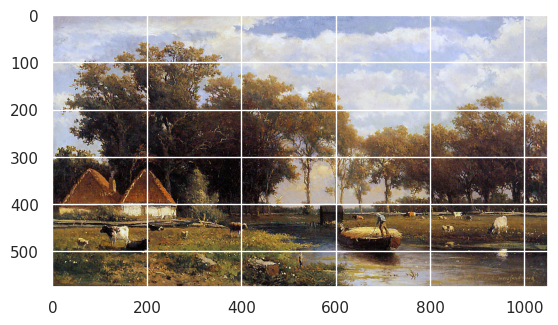

gustave-courbet_fishing-boats-on-the-deauville-beach-1866.jpg


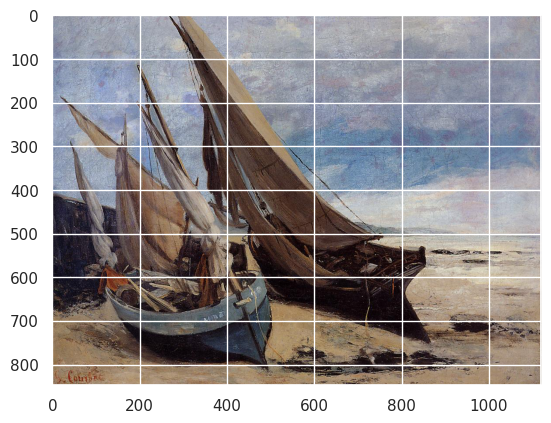

ivan-shishkin_near-yelabuga-1886.jpg


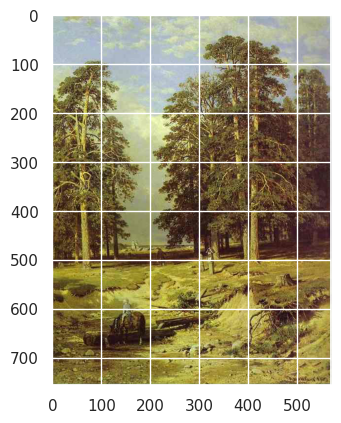

fyodor-vasilyev_barges-on-volga.jpg


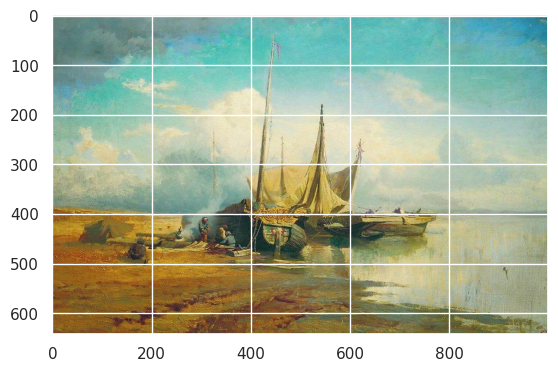

vasily-vereshchagin_posthumous-monuments-in-ladakh-1875.jpg


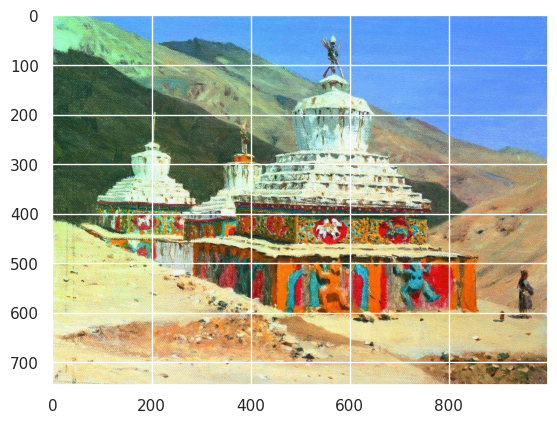

In [3]:
count = 0
for images in os.listdir(folder_path):
      print(images)
       # load image using matplotlib
      image = plt.imread(os.path.join(folder_path, images))
        
        # display the image
      plt.imshow(image)
      plt.show()
      count+=1
      if (count == 5):
        break

---
### Модель ЧБ
---

Библиотека «os» в Python — это модуль, предоставляющий способ использования функций, зависящих от операционной системы. Этот модуль используем для чтения исх датасета и записи  в новую папку (makedir).
Библиотека «PIL» в Python - модуль для работы с изображениями, но устаревший. Так как нужно было сделать только минимум из всего функционала - перевод в чб - то решили использовать именно эту библиотеку, а не его улучшенную версию - pillow

johan-hendrik-weissenbruch_summer-landscape.jpg


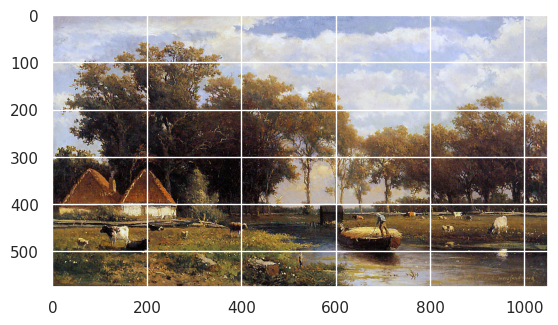

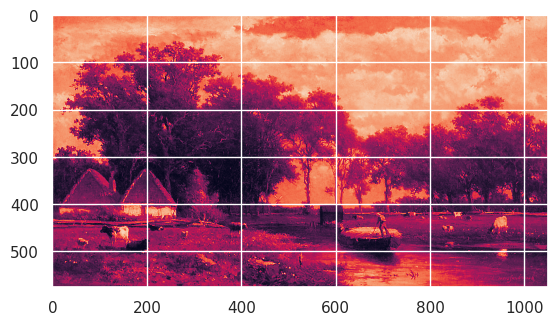

gustave-courbet_fishing-boats-on-the-deauville-beach-1866.jpg


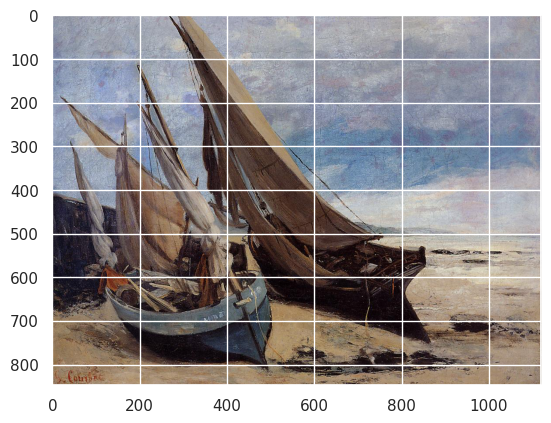

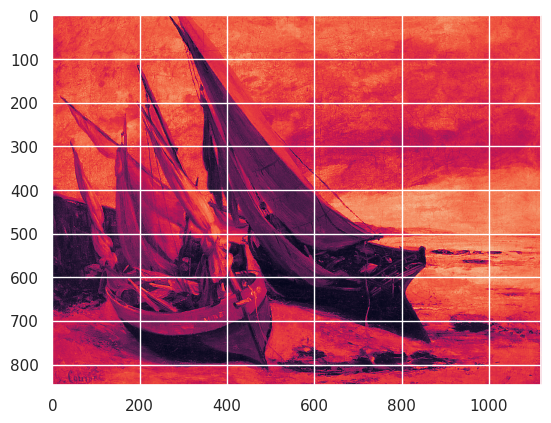

ivan-shishkin_near-yelabuga-1886.jpg


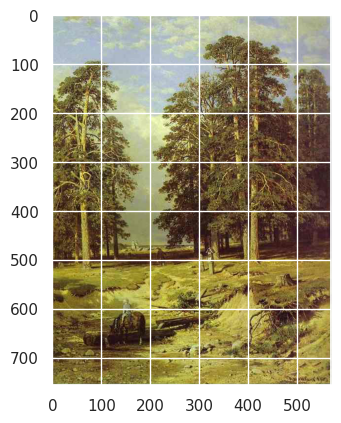

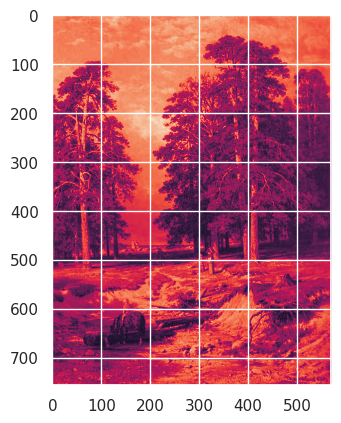

fyodor-vasilyev_barges-on-volga.jpg


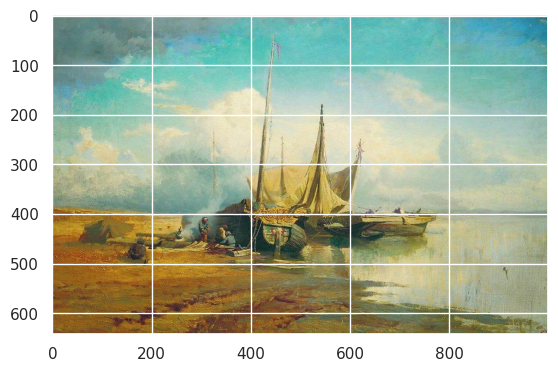

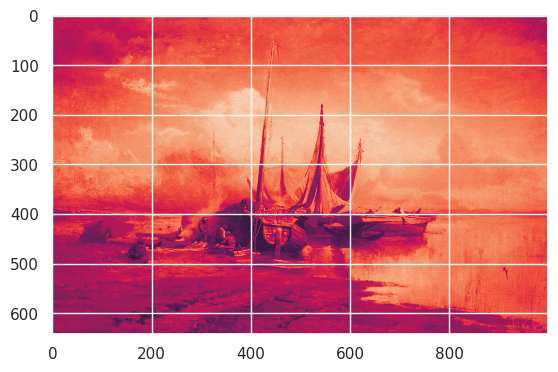

vasily-vereshchagin_posthumous-monuments-in-ladakh-1875.jpg


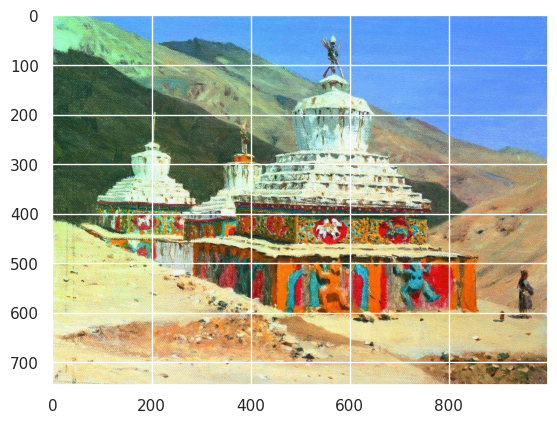

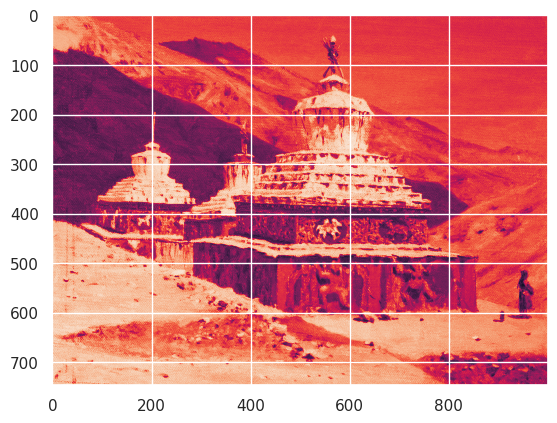

IsADirectoryError: ignored

In [4]:
import os
from PIL import Image
folder_path = "/content/drive/MyDrive/painting_ds"
# set the directory paths
output_folder = '/content/drive/MyDrive/bw_painting'

# create the new directory if it doesn't already exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
count = 0
# loop through all the files in the input folder
for images in os.listdir(folder_path):
    # get the file path
    input_file = os.path.join(folder_path, images)
    # load image using matplotlib
    image = plt.imread(os.path.join(folder_path, images))
    if count < 5:
      print(images)
      # display the image
      plt.imshow(image)
      plt.show()
      # open the image
    with Image.open(input_file) as img:
        # convert the image to black and white
        bw_img = img.convert('L')
        # get the output file path
        output_file = os.path.join(output_folder, images)
        # save the image
        bw_img.save(os.path.join(output_folder, "bw-"+images))
        if count < 5:
          plt.imshow(bw_img)
          plt.show()
          count += 1

К данному моменту мы имеем два датасета из более чем 1700 изображений, содержащий цветные и соотвествующие им черно-белые изображения.



---



В этом коде мы начинаем с определения путей к папкам с цветными и черно-белыми фотографиями, а также к тренировочной и тестовой папкам. Мы также определяем долю тестового набора, которая будет задана как 20%. Затем мы создаем папки для тренировочного и тестового наборов.

Далее мы считываем список всех файлов в папке с цветными фотографиями и выбираем случайным образом индексы файлов для тестовой выборки. Мы используем случайный выбор для того, чтобы наборы были случайными и универсальными.

Затем мы копируем соответствующие файлы из папки с цветными и черно-белой фотографиями в тренировочную и тестовую папки. Файлы выбираются в соответствии с индексами, которые мы выбрали для тестовой выборки ранее.

In [5]:
import os
import shutil
import random

source_dir = '/content/drive/MyDrive/painting_ds'  # путь к папке с цветными изображениями
bw_dir = '/content/drive/MyDrive/bw_painting'  # путь к папке с черно-белыми изображениями
train_dir = '/content/drive/MyDrive/train'  # путь к папке для тренировочного датасета
test_dir = '/content/drive/MyDrive/test'  # путь к папке для тестового датасета
test_ratio = 0.2  # доля файлов для тестового датасета

color_files = os.listdir(source_dir)  # список файлов в папке с цветными изображениями

bw_files = [os.path.join(bw_dir, 'bw-' + f) for f in color_files]  # формирование списка черно-белых файлов

train_files = []
test_files = []

for cf, bwf in zip(color_files, bw_files):
    root, ext = os.path.splitext(cf)
    if ext not in ['.jpg', '.jpeg', '.png']:  # пропуск файлов с неподдерживаемым расширением
        continue

    if not os.path.exists(bwf):  # пропуск файлов, у которых нет соответствующей черно-белой версии
        continue

    if random.random() < test_ratio:  # случайное распределение файлов между тестовым и тренировочным датасетами
        test_files.append((os.path.join(source_dir, cf), os.path.join(test_dir, cf)))
        test_files.append((bwf, os.path.join(test_dir, os.path.basename(bwf))))
    else:
        train_files.append((os.path.join(source_dir, cf), os.path.join(train_dir, cf)))
        train_files.append((bwf, os.path.join(train_dir, os.path.basename(bwf))))

for src, dst in train_files + test_files:
    os.makedirs(os.path.dirname(dst), exist_ok=True)  # создать папку для файлов, если ее нет
    shutil.copyfile(src, dst)  # копировать файл



---



Colorize with Matplotlib

First, you need to import the necessary libraries and load your grayscale image:

```python
import numpy as np
import matplotlib.pyplot as plt

# load grayscale image
gray_img = plt.imread('path/to/image.jpg')
```

Then, you can create a new 3-channel image array with the same dimensions as the grayscale image:

```python
# create color image array
color_img = np.zeros((gray_img.shape[0], gray_img.shape[1], 3))
```

Next, you can use the "plasma" colormap from matplotlib to map the grayscale values to RGB values:

```python
from matplotlib import cm

# apply colormap to grayscale values
color_map = cm.get_cmap('plasma')
color_img[:,:,:3] = color_map(gray_img)[:,:,:3]
```

Finally, you can display the resulting color image:

```python
# display color image
plt.imshow(color_img)
plt.axis('off')
plt.show()
```


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# load grayscale image
gray_img = plt.imread('/content/drive/MyDrive/test/bw-aleksey-savrasov_lake-in-the-swiss-mountains-1866.jpg')

In [7]:
# create color image array
color_img = np.zeros((gray_img.shape[0], gray_img.shape[1], 3))

In [8]:
from matplotlib import cm

# apply colormap to grayscale values
color_map = cm.get_cmap('rainbow')
color_img[:,:,:3] = color_map(gray_img)[:,:,:3]

<ipython-input-8-5f220b3485e8>:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = cm.get_cmap('rainbow')


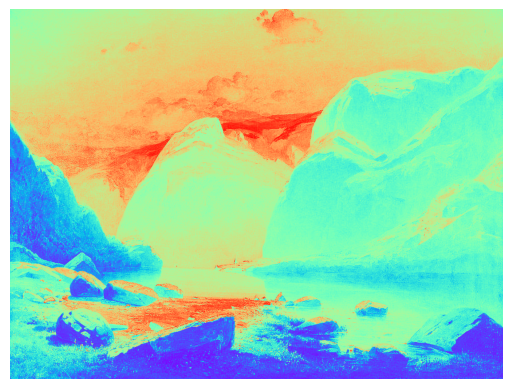

In [9]:
# display color image
plt.imshow(color_img)
plt.axis('off')
plt.show()